In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [5]:
X=df.drop('class',axis=1)
X=pd.get_dummies(X,drop_first=True)
y=df['class']

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.15,random_state=101)

In [7]:
from sklearn.ensemble import AdaBoostClassifier
model=AdaBoostClassifier(n_estimators=1)

In [8]:
model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=1)

In [10]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [11]:
y_pred = model.predict(X_test)

In [12]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           e       0.81      0.96      0.88       552
           p       0.96      0.81      0.88       667

    accuracy                           0.88      1219
   macro avg       0.88      0.88      0.88      1219
weighted avg       0.89      0.88      0.88      1219



In [13]:
confusion_matrix(y_pred,y_test)

array([[529,  23],
       [126, 541]], dtype=int64)

In [14]:
1-accuracy_score(y_pred,y_test)

0.12223133716160783

In [15]:
error_rates=[]

for n in range(1,96):
    model=AdaBoostClassifier(n_estimators=n)
    model.fit(X_train,y_train)
    y_pred2=model.predict(X_test)
    err=1-accuracy_score(y_pred2,y_test)

    error_rates.append(err)

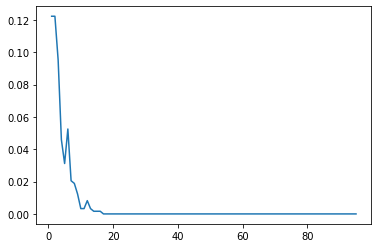

In [16]:
plt.plot(range(1,96),error_rates)